In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ID = 11211095
a = ID % 5

num_simulations = 500
loss_frequency_lambda = 2


mean_losssize = 70 + a
std_losssize = 20 + a
w = (std_losssize/mean_losssize)**2


mean = np.log(mean_losssize/np.sqrt(1+w))
variance = np.log(1+w)
std = np.sqrt(variance)

Text(0.5, 1.0, 'Distribution of Loss')

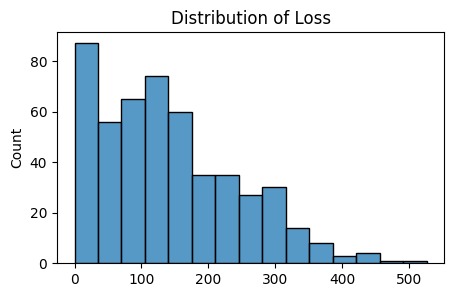

In [2]:
def sample_loss_size(num_loss_events, loss_severity_mean, loss_severity_std, total=False):
    sampled_loss_size = np.random.lognormal(mean=loss_severity_mean, sigma=loss_severity_std, size=num_loss_events)
    if total:
        sampled_loss_size = sampled_loss_size.sum()
    return sampled_loss_size

def loss_distribution_simulate(num_simulations=500, loss_frequency_lambda=2, loss_severity_mean=5, loss_severity_std=0.5):
    loss_frequency_samples = np.random.poisson(loss_frequency_lambda, num_simulations)
    total_loss = [sample_loss_size(n, loss_severity_mean, loss_severity_std, total=True) for n in loss_frequency_samples]
    return total_loss


loss_dist = loss_distribution_simulate(num_simulations=500, loss_frequency_lambda=loss_frequency_lambda, loss_severity_mean= mean, loss_severity_std= std)


plt.figure(figsize=(5, 3))
sns.histplot(loss_dist)
plt.title("Distribution of Loss")

In [3]:
VaR = np.percentile(loss_dist, 99)
print("Value at Risk (VaR) 99%:", VaR)

Value at Risk (VaR) 99%: 424.2667236646299
